In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import seaborn as sns

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

import pickle

import warnings
warnings.filterwarnings('ignore')

In [5]:
student=pd.read_csv('dataset.csv')

In [6]:
student.shape

(4424, 35)

In [7]:
student.columns


Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [8]:
student.sample(2)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
3793,1,8,1,15,1,1,1,13,28,6,...,0,6,0,0,0.000000,0,8.9,1.4,3.51,Dropout
2084,1,1,1,15,1,1,1,13,27,10,...,0,6,6,6,13.166667,0,11.1,0.6,2.02,Graduate


In [9]:
student.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [10]:
student.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [11]:
print(student.isnull().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [12]:
print(student.duplicated().sum())

0


In [13]:
student['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [14]:
student['Target'] = student['Target'].map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})
student

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,2
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,2


In [15]:
student.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age at enrollm

In [16]:
student.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,1.178119
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.888243
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,1.000000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,2.000000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,2.000000


In [17]:
student.corr()['Target']

Marital status                                   -0.089804
Application mode                                 -0.212025
Application order                                 0.089791
Course                                            0.007841
Daytime/evening attendance                        0.075107
Previous qualification                           -0.091365
Nacionality                                      -0.004740
Mother's qualification                           -0.038346
Father's qualification                            0.000329
Mother's occupation                               0.048424
Father's occupation                               0.051702
Displaced                                         0.113986
Educational special needs                        -0.007353
Debtor                                           -0.240999
Tuition fees up to date                           0.409827
Gender                                           -0.229270
Scholarship holder                                0.2975

In [18]:
student_df = student.iloc[:,[1,11,13,14,15,16,17,20,22,23,26,28,29,34]]
student_df.head()

,Application mode,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Target
0,8,1,0,1,1,0,20,0,0,0.000000,0,0,0.000000,0
1,6,1,0,0,1,0,19,6,6,14.000000,6,6,13.666667,2
2,1,1,0,0,1,0,19,6,0,0.000000,6,0,0.000000,0
3,8,1,0,1,0,0,20,6,6,13.428571,6,5,12.400000,2
4,12,0,0,1,0,0,45,6,5,12.333333,6,6,13.000000,2


<Axes: >

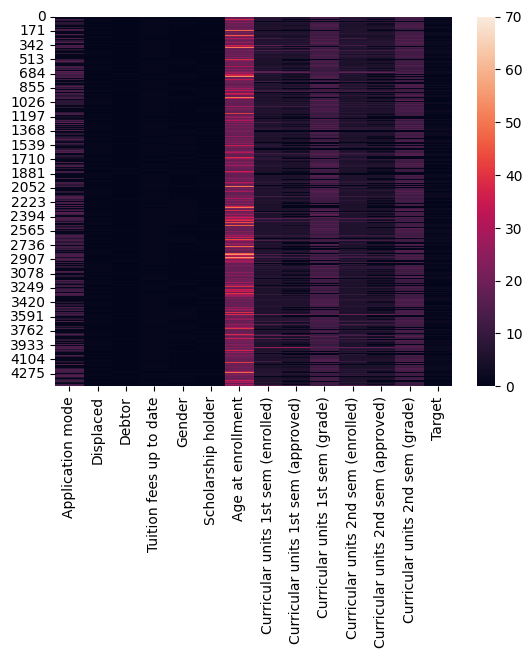

In [19]:
sns.heatmap(student_df)

In [20]:
student_df['Target'].value_counts()

2    2209
0    1421
1     794
Name: Target, dtype: int64

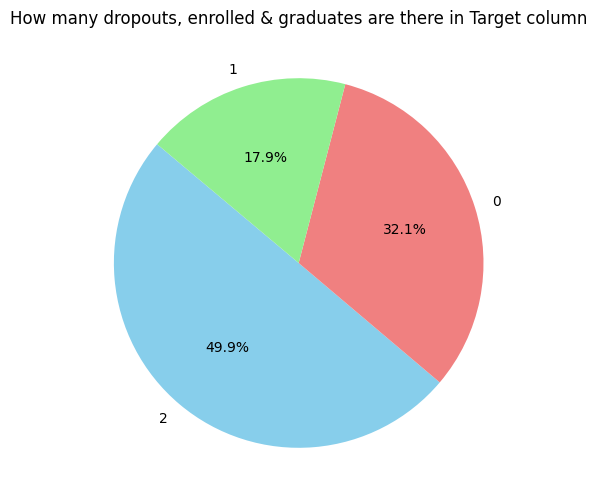

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
x = student_df['Target'].value_counts().index
y = student_df['Target'].value_counts().values
plt.figure(figsize=(6, 6))
plt.pie(y, labels=x, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('How many dropouts, enrolled & graduates are there in Target column')
plt.show()

In [22]:
student_df.corr()['Target']

Application mode                      -0.212025
Displaced                              0.113986
Debtor                                -0.240999
Tuition fees up to date                0.409827
Gender                                -0.229270
Scholarship holder                     0.297595
Age at enrollment                     -0.243438
Curricular units 1st sem (enrolled)    0.155974
Curricular units 1st sem (approved)    0.529123
Curricular units 1st sem (grade)       0.485207
Curricular units 2nd sem (enrolled)    0.175847
Curricular units 2nd sem (approved)    0.624157
Curricular units 2nd sem (grade)       0.566827
Target                                 1.000000
Name: Target, dtype: float64

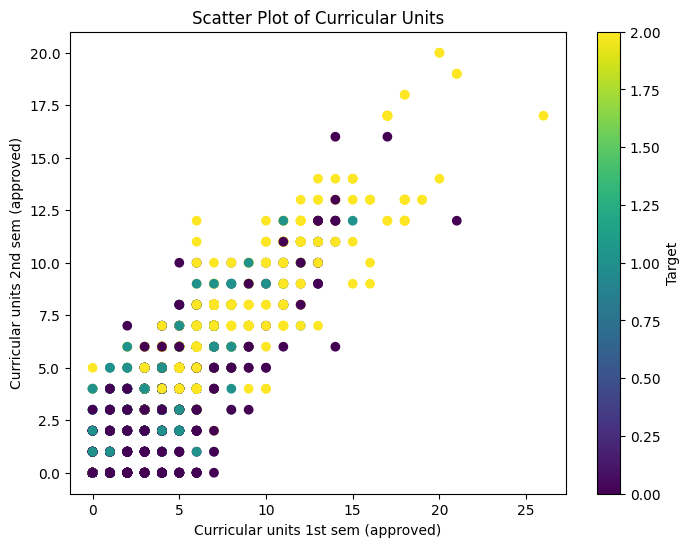

In [23]:
import matplotlib.pyplot as plt
x = student_df['Curricular units 1st sem (approved)']
y = student_df['Curricular units 2nd sem (approved)']
colors = student_df['Target']
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=colors, cmap='viridis')
plt.xlabel('Curricular units 1st sem (approved)')
plt.ylabel('Curricular units 2nd sem (approved)')
plt.title('Scatter Plot of Curricular Units')
plt.colorbar(label='Target')
plt.show()


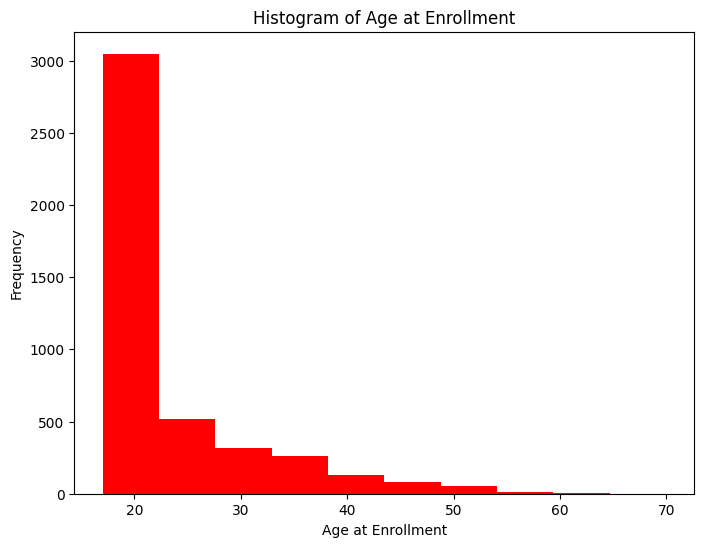

In [24]:
import matplotlib.pyplot as plt
data = student_df['Age at enrollment']

# Create a Matplotlib histogram
plt.figure(figsize=(8, 6))
plt.hist(data, bins=10, color='red')
plt.xlabel('Age at Enrollment')
plt.ylabel('Frequency')
plt.title('Histogram of Age at Enrollment')
plt.show()


<Axes: xlabel='Age at enrollment', ylabel='Count'>

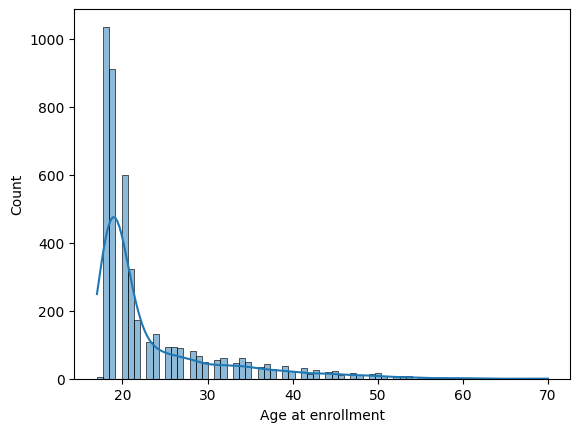

In [25]:
sns.histplot(data=student_df['Age at enrollment'], kde=True)

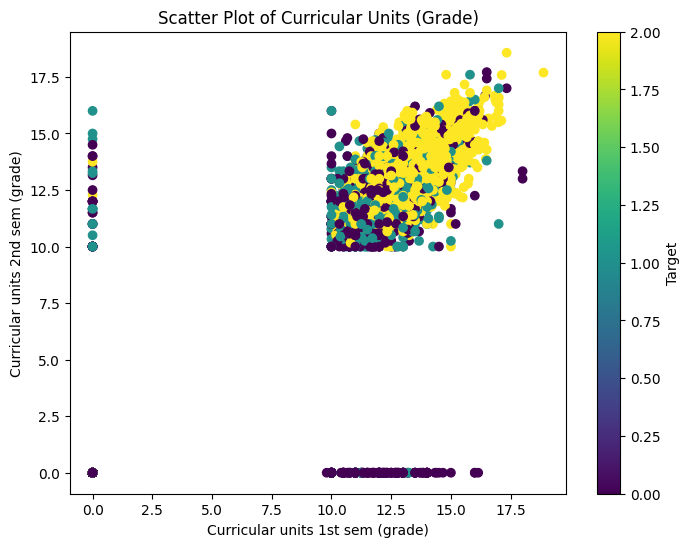

In [26]:
import matplotlib.pyplot as plt
import pandas as pd


# Extract data for the scatter plot
x = student_df['Curricular units 1st sem (grade)']
y = student_df['Curricular units 2nd sem (grade)']
colors = student_df['Target']

# Create a Matplotlib scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x, y, c=colors, cmap='viridis')
plt.xlabel('Curricular units 1st sem (grade)')
plt.ylabel('Curricular units 2nd sem (grade)')
plt.title('Scatter Plot of Curricular Units (Grade)')
plt.colorbar(scatter, label='Target')
plt.show()


In [27]:
X = student_df.iloc[:,0:13]
y = student_df.iloc[:,-1]
X

,Application mode,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade)
0,8,1,0,1,1,0,20,0,0,0.000000,0,0,0.000000
1,6,1,0,0,1,0,19,6,6,14.000000,6,6,13.666667
2,1,1,0,0,1,0,19,6,0,0.000000,6,0,0.000000
3,8,1,0,1,0,0,20,6,6,13.428571,6,5,12.400000
4,12,0,0,1,0,0,45,6,5,12.333333,6,6,13.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,0,0,1,1,0,19,6,5,13.600000,6,5,12.666667
4420,1,1,1,0,0,0,18,6,6,12.000000,6,2,11.000000
4421,1,1,0,1,0,1,30,7,7,14.912500,8,1,13.500000
4422,1,1,0,1,0,1,20,5,5,13.800000,5,5,12.000000


In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3539, 13)
(885, 13)
(3539,)
(885,)


In [29]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

#without scaling
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without Scaling and without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

Without Scaling and without CV:  0.6700564971751413
Without Scaling and With CV:  0.6767473311886812


In [30]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

# Without Scaling
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without Scaling and without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

Without Scaling and without CV:  0.7728813559322034
Without Scaling and With CV:  0.7640618748099421


In [31]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(max_iter=1000, tol=1e-3)

# Without Scaling
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without Scaling and without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

Without Scaling and without CV:  0.5943502824858757
Without Scaling and With CV:  0.7004921496134825


In [32]:
from sklearn.linear_model import Perceptron
# this is same as SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None)

clf = Perceptron(tol=1e-3, random_state=0)
# Without Scaling
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without Scaling and without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

Without Scaling and without CV:  0.6734463276836158
Without Scaling and With CV:  0.7013396072406012


In [33]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, random_state=0)

# Without Scaling
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without Scaling and without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

Without Scaling and without CV:  0.7661016949152543
Without Scaling and With CV:  0.762364558825883


In [34]:
# Using DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

#without scaling
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without Scaling and without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

Without Scaling and without CV:  0.6700564971751413
Without Scaling and With CV:  0.6767473311886812


In [35]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=10, random_state=0)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without Scaling and without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

Without Scaling and without CV:  0.7706214689265537
Without Scaling and With CV:  0.7623613578527871


In [36]:
from sklearn.svm import SVC
#clf = SVC(gamma='auto')

svc = SVC()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
clf = GridSearchCV(svc, parameters)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without Scaling and without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

Without Scaling and without CV:  0.7638418079096045
Without Scaling and With CV:  0.7584081560794481


In [37]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()


clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without Scaling and CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

Without Scaling and CV:  0.7107344632768362
Without Scaling and With CV:  0.711219410700853


In [38]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without Scaling and without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

Without Scaling and without CV:  0.6350282485875707
Without Scaling and With CV:  0.6648861253821161


In [39]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without Scaling and without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

Without Scaling and without CV:  0.6836158192090396
Without Scaling and With CV:  0.6922888558121668


In [40]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without Scaling and without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

Without Scaling and without CV:  0.6994350282485876
Without Scaling and With CV:  0.709807781565596


In [42]:
clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)

print("With CV: ",scores.mean())
print("Precision Score: ", precision_score(y_test, y_pred,average='macro'))
print("Recall Score: ", recall_score(y_test, y_pred,average='macro'))
print("F1 Score: ", f1_score(y_test, y_pred,average='macro'))

Without CV:  0.7706214689265537
With CV:  0.7623613578527871
Precision Score:  0.7219328025588277
Recall Score:  0.6686687843991215
F1 Score:  0.6812146934553023


In [43]:
param_grid = {
    'bootstrap': [False,True],
    'max_depth': [5,8,10, 20],
    'max_features': [3, 4, 5, None],
    'min_samples_split': [2, 10, 12],
    'n_estimators': [100, 200, 300]
}

rfc = RandomForestClassifier()

clf = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 1)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print(clf.best_params_)
print(clf.best_estimator_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Accuracy:  0.7661016949152543
{'bootstrap': True, 'max_depth': 20, 'max_features': 5, 'min_samples_split': 12, 'n_estimators': 300}
RandomForestClassifier(max_depth=20, max_features=5, min_samples_split=12,
                       n_estimators=300)


In [44]:
clf = RandomForestClassifier(bootstrap=False, max_depth=10,max_features=3,min_samples_split=12,n_estimators=100, random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("With CV: ",scores.mean())

print("Precision Score: ", precision_score(y_test, y_pred,average='micro'))
print("Recall Score: ", recall_score(y_test, y_pred,average='micro'))
print("F1 Score: ", f1_score(y_test, y_pred,average='micro'))

Without CV:  0.7717514124293785
With CV:  0.7629263296041997
Precision Score:  0.7717514124293785
Recall Score:  0.7717514124293785
F1 Score:  0.7717514124293785


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define your parameter grid
param_grid = {
    'bootstrap': [False, True],
    'max_depth': [5, 8, 10, 20],
    'max_features': [3, 4, 5, None],
    'min_samples_split': [2, 10, 12],
    'n_estimators': [100, 200, 300]
}

# Initialize a RandomForestClassifier
rfc = RandomForestClassifier()

# Create a GridSearchCV object
clf = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the GridSearchCV object on your data
clf.fit(X_train, y_train)

# Access the best model
best_model = clf.best_estimator_

# Now you can use the best_model for predictions or further analysis
y_pred = best_model.predict(X_test)
print("Accuracy with best_model: ", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Accuracy with best_model:  0.7706214689265537


In [46]:
!pip install -U ibm-watson-machine-learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 60.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 17.0 MB/s eta 0:00:00
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.13.2-py3-none-any.whl size=73905 sha256=608bd30ed30c234e29d470bbff55ac3cc0b3d64df18413f8cad16b0800aae95c
  Stored in directory: /root/.cache/pip/wheels/02/74/84/b23401241f593c79d38bb1e1b0f788e7744aa07338e6382421
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.13.2-py3-none-any.whl size=634575 sha256=a0a792149d3b3dbcd3216d3b8523a7c8abdb40ac5fe8731e0814dd9d4f43c1a5
  Stored in directory: /root/.cac

In [47]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

In [48]:
wml_credentials = {
    "apikey":"cwa-5iKuhtcyCUZ6xdGwxOY94433rfqFMQFZp7SzkGED",
    "url":"https://us-south.ml.cloud.ibm.com"
}
client = APIClient(wml_credentials)

In [53]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ----  ------------------------
ID                                    NAME  CREATED
190ec1c5-0ba6-4e43-a368-2d402a536e63  CAD   2023-10-30T18:08:08.162Z
------------------------------------  ----  ------------------------


,ID,NAME,CREATED
0,190ec1c5-0ba6-4e43-a368-2d402a536e63,CAD,2023-10-30T18:08:08.162Z


In [50]:
SPACE_ID="190ec1c5-0ba6-4e43-a368-2d402a536e63"

In [51]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [64]:
# Set the space ID
space_id = "190ec1c5-0ba6-4e43-a368-2d402a536e63"

# Set the default space
wml_client.set.default_space(space_id)

# List available software specifications
software_specs = wml_client.software_specifications.list()
print(software_specs)


----------------------------  ------------------------------------  ----  ------------  --------------------------
NAME                          ID                                    TYPE  STATE         REPLACEMENT
default_py3.6                 0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base  retired       runtime-22.2-py3.10
autoai-ts_rt23.1-py3.10       01ce9391-1a79-5a33-94fb-2e134337f314  base  supported
kernel-spark3.2-scala2.12     020d69ce-7ac1-5e68-ac1a-31189867356a  base  retired
pytorch-onnx_1.3-py3.7-edt    069ea134-3346-5748-b513-49120e15d288  base  retired
tensorflow_rt23.1-py3.10      079a91e0-245f-5269-8926-3c20b28f37dc  base  supported
scikit-learn_0.20-py3.6       09c5a1d0-9c1e-4473-a344-eb7b665ff687  base  retired       runtime-22.2-py3.10
spark-mllib_3.0-scala_2.12    09f4cff0-90a7-5899-b9ed-1ef348aebdee  base  retired
pytorch-onnx_rt22.1-py3.9     0b848dd4-e681-5599-be41-b5f6fccc6471  base  retired       pytorch-onnx_rt22.2-py3.10
ai-function_0.1-py3.6         0cdb0f1e-5

In [52]:
MODEL_NAME="RANDOM FOREST MODEL"
DEPLOYMENT_NAME="CAD DEPLOYMENT"
BEST_MODEL=best_model

In [56]:
client.set.default_space(SPACE_ID)

'SUCCESS'

In [103]:

software_spec_uid = wml_client.software_specifications.get_id_by_name('default_py3.7')

# Setup model meta
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_0.23',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
}

#Save model
model_details = wml_client.repository.store_model(
    model=BEST_MODEL,
    meta_props=model_props,
    training_data=X_train.head(),
    training_target=y_train.head()
)
env_details = wml_client.software_specifications.get_details(software_spec_id)

# Print the environment details
print(env_details)

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ibm_watson_machine_learning/libs/repo/mlrepositoryclient/model_collection.py", line 245, in _save_scikit_pipeline_model
    model_artifact = self._create_pipeline_model(artifact, query_param)
  File "/usr/local/lib/python3.10/dist-packages/ibm_watson_machine_learning/libs/repo/mlrepositoryclient/model_collection.py", line 505, in _create_pipeline_model
    model_artifact = self._create_pipeline_model_v4_cloud(model_artifact, query_param)
  File "/usr/local/lib/python3.10/dist-packages/ibm_watson_machine_learning/libs/repo/mlrepositoryclient/model_collection.py", line 1018, in _create_pipeline_model_v4_cloud
    model_output = self.repository_api.ml_assets_model_creation_v4_cloud(model_input, query_param,headers)
  File "/usr/local/lib/python3.10/dist-packages/ibm_watson_machine_learning/libs/repo/swagger_client/apis/repository_api.py", line 275, in ml_assets_model_creation_v4_cloud
    (data) = self.ml_a

WMLClientError: ignored

In [104]:
software_specs = wml_client.software_specifications.list()
for spec in software_specs['resources']:
    print(f"Name: {spec['metadata']['name']}, ID: {spec['metadata']['guid']}")


----------------------------  ------------------------------------  ----  ------------  --------------------------
NAME                          ID                                    TYPE  STATE         REPLACEMENT
default_py3.6                 0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base  retired       runtime-22.2-py3.10
autoai-ts_rt23.1-py3.10       01ce9391-1a79-5a33-94fb-2e134337f314  base  supported
kernel-spark3.2-scala2.12     020d69ce-7ac1-5e68-ac1a-31189867356a  base  retired
pytorch-onnx_1.3-py3.7-edt    069ea134-3346-5748-b513-49120e15d288  base  retired
tensorflow_rt23.1-py3.10      079a91e0-245f-5269-8926-3c20b28f37dc  base  supported
scikit-learn_0.20-py3.6       09c5a1d0-9c1e-4473-a344-eb7b665ff687  base  retired       runtime-22.2-py3.10
spark-mllib_3.0-scala_2.12    09f4cff0-90a7-5899-b9ed-1ef348aebdee  base  retired
pytorch-onnx_rt22.1-py3.9     0b848dd4-e681-5599-be41-b5f6fccc6471  base  retired       pytorch-onnx_rt22.2-py3.10
ai-function_0.1-py3.6         0cdb0f1e-5

KeyError: ignored

In [71]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'Target',
  'schemas': {'input': [{'fields': [{'name': 'Application mode',
       'type': 'int64'},
      {'name': 'Displaced', 'type': 'int64'},
      {'name': 'Debtor', 'type': 'int64'},
      {'name': 'Tuition fees up to date', 'type': 'int64'},
      {'name': 'Gender', 'type': 'int64'},
      {'name': 'Scholarship holder', 'type': 'int64'},
      {'name': 'Age at enrollment', 'type': 'int64'},
      {'name': 'Curricular units 1st sem (enrolled)', 'type': 'int64'},
      {'name': 'Curricular units 1st sem (approved)', 'type': 'int64'},
      {'name': 'Curricular units 1st sem (grade)', 'type': 'float64'},
      {'name': 'Curricular units 2nd sem (enrolled)', 'type': 'int64'},
      {'name': 'Curricular units 2nd sem (approved)', 'type': 'int64'},
      {'name': 'Curricular units 2nd sem (grade)', 'type': 'float64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '01ce9391-1a79-

In [72]:
model_uid = wml_client.repository.get_model_uid(model_details); model_uid

This method is deprecated, please use get_model_id()


'c4470cdf-3973-4921-95ed-afed5b93c801'

In [97]:
# Set meta
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

# Deploy
deployment = wml_client.deployments.create(
    artifact_uid=model_uid,
    meta_props=deployment_props
)

# Output result
deployment

{"trace":"ba7e55e68ab3c7764dc671aa559205ff","errors":[{"code":"unsupported_framework_details","message":"Scikit-learn 0.22 framework version is no longer supported. Use Scikit-learn 0.23 with default_py3.7 software specification instead. For details, see https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/pm_service_supported_frameworks.html."}]}


--------------------------
Deployment creation failed
--------------------------




WMLClientError: ignored

In [98]:
payload

NameError: ignored